## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`


### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.

# Solution

### EDA

In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

<Axes: xlabel='median_house_value', ylabel='Count'>

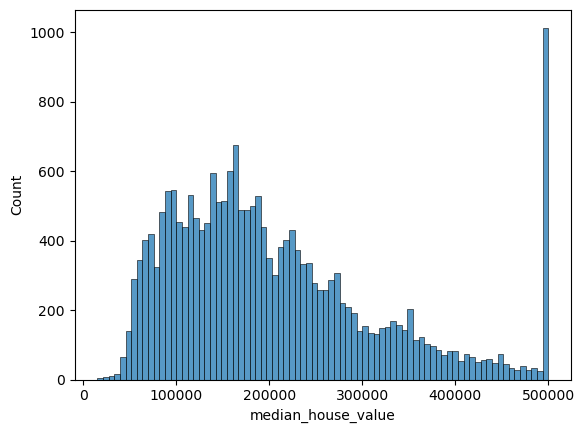

In [41]:
df = pd.read_csv('./housing.csv')

sns.histplot(df['median_house_value'], bins=80)

### Preparing dataset

In [42]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]
df = df[['latitude', 
         'longitude',
         'housing_median_age', 
         'total_rooms', 
         'total_bedrooms', 
         'population', 
         'households',
         'median_income',
         'median_house_value']]
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


## Question 1

In [43]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2

In [44]:
df.population.median()

1195.0

## Prepare and split the dataset

In [57]:
np.random.seed(42)

n = len(df)
indices = np.arange(n)
np.random.shuffle(indices)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - n_val - n_test


df_train = df.iloc[indices[:n_train]].reset_index()
df_val = df.iloc[indices[n_train:n_train+n_val]].reset_index()
df_test = df.iloc[indices[n_train+n_val:]].reset_index()

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

for temp in [df_train, df_val, df_test]:
    temp.drop('median_house_value', axis=1, inplace=True)

print(df.shape, df_train.shape[0] + df_test.shape[0]+df_val.shape[0])

(15687, 9) 15687


## Question 3

In [70]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.c_[ones, X]
    XTX = X.T@X
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv@X.T@y
    w0, *w = w_full
    return w0, w

def rmse(y_pred: np.array, y_true: np.array):
    se: np.array = (y_pred - y_true)**2
    return np.sqrt(se.mean())

Filling nan value with 0

In [85]:
df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

df_val_copy.total_bedrooms.fillna(0, inplace=True)
df_train_copy.total_bedrooms.fillna(0, inplace=True)
w0, w = train_linear_regression(df_train_copy, y_train)

y_pred = df_val@w + w0
y_pred = y_pred[0]

print(f'{y_pred = }')
score = rmse(y_pred, y_val)
print(f'rmse = {score:.2f}')

y_pred = 11.718901767393831
rmse = 0.64


Filling nan value with mean

In [86]:
df_train_copy = df_train.copy()
df_val_copy = df_val.copy()

df_train_copy.total_bedrooms.fillna(df_train_copy.total_bedrooms.mean(), inplace=True)

w0, w = train_linear_regression(df_train_copy, y_train)

y_pred = df_val@w + w0
y_pred = y_pred[0]

print(f'{y_pred = }')
score = rmse(y_pred, y_val)
print(f'rmse = {score:.2f}')

y_pred = 11.71522573168062
rmse = 0.64


## Question 4

In [125]:
def train_linear_regression_reg(X: np.ndarray, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T@X
    XTX = XTX + np.eye(XTX.shape[0])*r
    inv_XTX = np.linalg.inv(XTX)
    w_full = inv_XTX@X.T@y
    w0, *w = w_full
    return w0, w

In [129]:
X_train = df_train.copy()
X_train['total_bedrooms'] = df_train.total_bedrooms.fillna(0)

X_val = df_val.copy()
X_val['total_bedrooms'] = df_val.total_bedrooms.fillna(0)

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = X_val.dot(w) + w0

    score = rmse(y_val, y_pred)
    print(f'{r=}, {score=:.2f}')

r=0, score=0.34
r=1e-06, score=0.34
r=0.0001, score=0.34
r=0.001, score=0.34
r=0.01, score=0.34
r=0.1, score=0.34
r=1, score=0.35
r=5, score=0.35
r=10, score=0.35


## Question 5

In [135]:
n = len(df)
indices = np.arange(n)

n_val = int(0.2*n)
n_test = int(0.2*n)
n_train = n - n_val - n_test
scores = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    np.random.seed(i)

    np.random.shuffle(indices)

    df_train = df.iloc[indices[:n_train]].reset_index()
    df_val = df.iloc[indices[n_train:n_train+n_val]].reset_index()
    df_test = df.iloc[indices[n_train+n_val:]].reset_index()

    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)

    for temp in [df_train, df_val, df_test]:
        temp.fillna(0, inplace=True)
        temp.drop('median_house_value', axis=1, inplace=True)

    w0, w = train_linear_regression(df_train, y_train)

    y_pred = df_val.dot(w) + w0

    score = rmse(y_val, y_pred)
    scores.append(score)

std_scores = np.array(scores).std()
print(f'{std_scores=:.3f}')

std_scores=0.006


## Question 6

In [137]:
np.random.seed(9)

np.random.shuffle(indices)

df_train = df.iloc[indices[:n_train]].reset_index()
df_val = df.iloc[indices[n_train:n_train+n_val]].reset_index()
df_test = df.iloc[indices[n_train+n_val:]].reset_index()

df_full_train = pd.concat([df_train, df_val])

y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

y_full_train = np.concatenate([y_train, y_val])

for temp in [df_full_train, df_test]:
    temp.fillna(0, inplace=True)
    temp.drop('median_house_value', axis=1, inplace=True)

w0, w = train_linear_regression_reg(df_full_train, y_full_train, r=0.001)

y_pred = df_test.dot(w) + w0

score = rmse(y_test, y_pred)

print(f'{score=}')

score=0.3413051503409916
